# Linear regression

By: Sara Salim

This project was completed as part of the Data analysis with Python -course, organized and conducted by the University of Helsinki, as one of its MOOC programs. Each of the exercises has detailed instructions for completion and there is a test file included in the project folder, to test the solutions. The project received a grade of 5/5.

Imports used for this project:

In [2]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import Logit
from statsmodels.graphics.regressionplots import abline_plot 
import pandas as pd

We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [3]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
filename = get_path("fram.txt")
fram = pd.read_csv(filename, sep='\t')
fram.describe()

ID          AGE          FRW          SBP       SBP10  \
count  1394.000000  1394.000000  1394.000000  1394.000000  767.000000   
mean   4737.184362    52.431133   105.365136   148.086083  148.040417   
std    1073.406896     4.781507    17.752489    28.022062   25.706664   
min    1070.000000    45.000000    52.000000    90.000000   94.000000   
25%    3890.250000    48.000000    94.000000   130.000000  130.000000   
50%    4821.000000    52.000000   103.000000   142.000000  145.000000   
75%    5641.750000    56.000000   114.000000   160.000000  160.000000   
max    6442.000000    62.000000   222.000000   300.000000  264.000000   

               DBP         CHOL          CIG          CHD        DEATH  \
count  1394.000000  1394.000000  1394.000000  1394.000000  1394.000000   
mean     90.135581   234.644907     8.029412     1.187948     1.700861   
std      14.226235    46.303822    11.584138     2.615976     3.203132   
min      50.000000    96.000000     0.000000     0.000000     0.000000   
25%      80.000000   200.000000     0.000000     0.000000     0.000000   
50%      90.000000   230.000000     0.000000     0.000000     0.000000   
75%      98.000000   264.000000    20.000000     0.000000     0.000000   
max     160.000000   430.000000    60.000000    10.000000    10.000000   

           YRS_DTH  
count  1394.000000  
mean     16.219512  
std       3.921413  
min       1.000000  
25%      18.000000  
50%      18.000000  
75%      18.000000  
max      18.000000

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [5]:
# exercise 2
# Put your solution here!
def rescale(series):
    mean = series.mean()
    std_dev = series.std()
    rescaled = (series - mean) / (2 * std_dev)
    
    return rescaled

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [6]:
# exercise 3
# Put your solution here!
variables = fram.select_dtypes(include=['number']).columns
for var in variables:
    fram[f's{var}'] = rescale(fram[var])
print(fram)

        ID     SEX  AGE  FRW  SBP  SBP10  DBP  CHOL  CIG  CHD  ...      sAGE  \
0     4988  female   57  135  186    NaN  120   150    0    1  ...  0.477764   
1     3001  female   60  123  165    NaN  100   167   25    0  ...  0.791473   
2     5079  female   54  115  140    NaN   90   213    5    0  ...  0.164056   
3     5162  female   52  102  170    NaN  104   280   15    0  ... -0.045083   
4     4672  female   45   99  185    NaN  105   326   20    0  ... -0.777070   
...    ...     ...  ...  ...  ...    ...  ...   ...  ...  ...  ...       ...   
1389  4132    male   51  100  160    NaN   98   216   30    0  ... -0.149653   
1390  5418    male   50   95  174    NaN  106   192    5    0  ... -0.254223   
1391  6260    male   57   88  144    NaN   96   184   20    0  ...  0.477764   
1392  5786    male   62   87  156    NaN   90   255    0    0  ...  1.000612   
1393  6071    male   45   83  156    NaN   90   255   15    0  ... -0.777070   

          sFRW      sSBP sSBP10      sD

Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [7]:
# exercise 4
# Put your solution here!
formula = 'SBP ~ sFRW + SEX + sCHOL'
fit = smf.ols(formula, data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.13e-40
Time:                        04:44:11   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [8]:
# exercise 5
# Put your solution here!
formula = 'SBP ~ sFRW + SEX + sCHOL + sAGE'
fit = smf.ols(formula, data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.44e-46
Time:                        04:44:15   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

Question: "How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?"

***
The R-squared value from the previous model was 0.125, but now that we included age, the R-squared value increased to 0.146. So it increased a little bit, by 16.8% approximately.

The variable with the strongest impact on target variable is FRW by its coefficient 16.9771, which is the weight. Second strongest variable would be age, which had the coefficient of 8.1332.
***

Try to add to the model all the interactions with other variables. 

In [9]:
# exercise 6
# Put your solution here!
formula = 'SBP ~ sFRW + sCHOL + sAGE + SEX + sFRW:sCHOL + sFRW:sAGE + sFRW:SEX + sCHOL:sAGE + sCHOL:SEX + sAGE:SEX'
fit = smf.ols(formula, data=fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           4.92e-43
Time:                        04:44:17   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

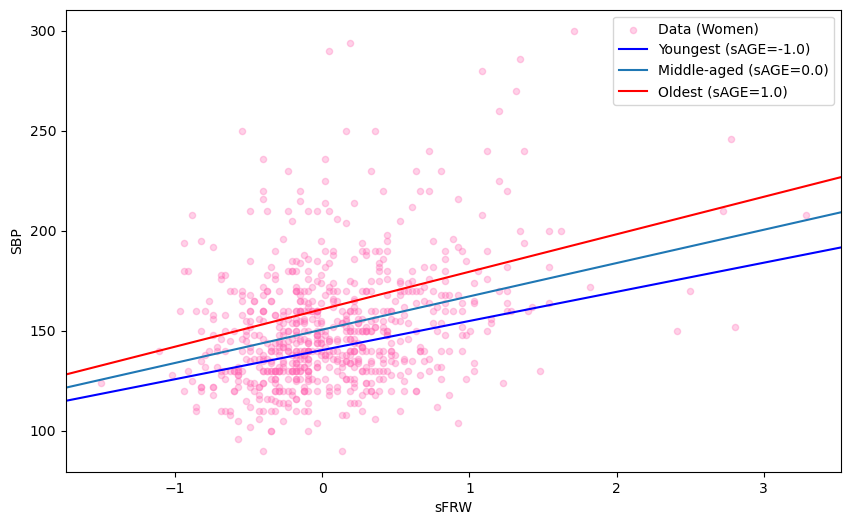

In [10]:
# exercise 7
# Put your solution here!
p = fit.params
fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP", color="hotpink", alpha=0.3, label="Data (Women)", figsize=(10, 6))
abline_plot(intercept=p.Intercept - p["sAGE"], slope=p.sFRW + p["sFRW:sAGE"], ax=plt.gca(), color="blue", label="Youngest (sAGE=-1.0)")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), label="Middle-aged (sAGE=0.0)")
abline_plot(intercept=p.Intercept + p["sAGE"], slope=p.sFRW - p["sFRW:sAGE"], ax=plt.gca(), color="red", label="Oldest (sAGE=1.0)")
plt.legend()

Question: "How does the dependence of blood pressure on weight change as a person gets older?"
***
Based on the previous visualization, the older a person gets, the stronger the effect of the weight is on their systolic blood pressure.
***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.99e-40
Time:                        04:44:25   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

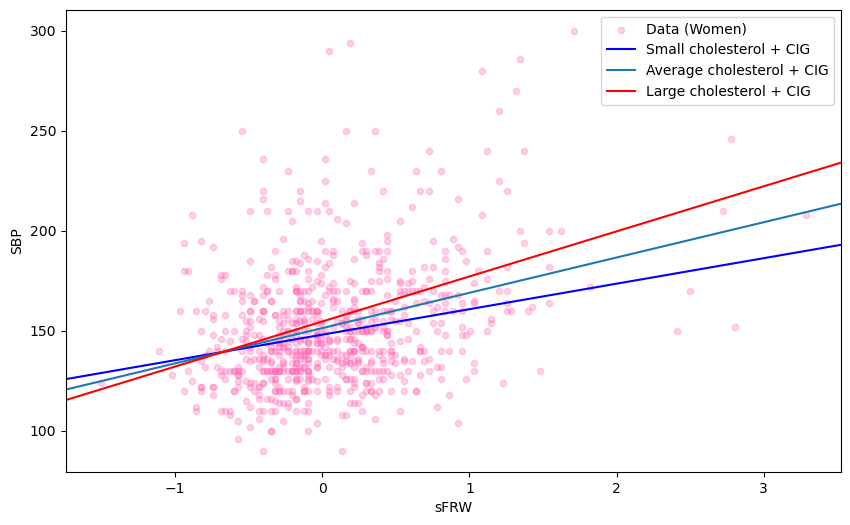

In [11]:
# exercise 8
# Put your solution here!
formula = 'SBP ~ sFRW + sCHOL + sAGE + SEX + sCIG + sFRW:sCHOL + sFRW:sAGE + sFRW:SEX + sCHOL:sAGE + sCHOL:SEX + sAGE:SEX + sCIG:sFRW + sCIG:sCHOL + sCIG:sAGE + sCIG:SEX'
fit = smf.ols(formula, data=fram).fit()
print(fit.summary())
p = fit.params
fram[fram.SEX == "female"].plot.scatter("sFRW", "SBP", color="hotpink", alpha=0.3, label="Data (Women)", figsize=(10, 6))
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p['sFRW:sCHOL'], ax=plt.gca(), color="blue", label="Small cholesterol + CIG")
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), label="Average cholesterol + CIG")
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p['sFRW:sCHOL'], ax=plt.gca(), color="red", label="Large cholesterol + CIG")
plt.legend()

Question: "How does the model and its accuracy look?"

***
The R-squared value is only about 0.152 which is 15.2%, this means it doesn't explain all the variability in the model, but it does explain some of it. The plot results make sense, since people who have large cholesterol and smoke, their SBP increases much faster when they gain weight, versus people who have small cholesterol and smoke.
***

# Logistic regression

In [12]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [15]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype(int)
fram.HIGH_BP.head()
np.random.seed(1)
for i in range(100):
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,
                  family=Binomial(link=Logit())).fit()
    
    pred = fit.predict(fram)
    error_rate_orig = np.mean(((pred < 0.5) & (fram.HIGH_BP == 1)) |
                          ((pred > 0.5) & (fram.HIGH_BP == 0)))

print(error_rate_orig)

0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [16]:
# exercise 10
# Put your solution here!
np.random.seed(1)
for i in range(100):
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + SEX:sAGE + sFRW:sAGE", data=fram,
                  family=Binomial(link=Logit())).fit()
    
    pred = fit.predict(fram)
    error_rate = np.mean(((pred < 0.5) & (fram.HIGH_BP == 1)) |
                          ((pred > 0.5) & (fram.HIGH_BP == 0)))
    
print(error_rate)

0.3278335724533716


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

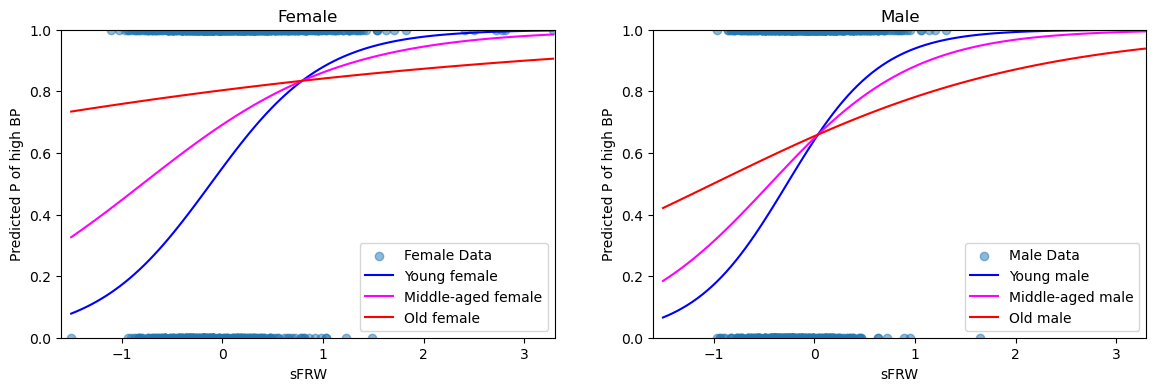

In [17]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
sFRW_grid = np.linspace(fram['sFRW'].min(), fram['sFRW'].max(), 100)

prediction_data = pd.DataFrame({
    'sFRW': np.tile(sFRW_grid, 6),
    'sFRW_scaled': np.tile((sFRW_grid - fram['sFRW'].mean()) / fram['sFRW'].std(), 6)
})

age_groups = [-1.0, 0.0, 1.0]  
sexes = ['female', 'male']

fig, ax = plt.subplots(1, 2, subplot_kw={"xlim": (-1.6, 3.3), "ylim": (0, 1),
                                         "xlabel": "sFRW", "ylabel": "Predicted P of high BP"},
                       figsize=(14, 4))

for i, sex in enumerate(sexes):
    ax[i].scatter(fram.sFRW[fram.SEX == sex], 
                  fram.HIGH_BP[fram.SEX == sex], alpha=0.5, label=f"{sex.capitalize()} Data")
    for j, age in enumerate(age_groups):
        prediction_data['sAGE'] = age
        prediction_data['SEX'] = sex
        pred = fit.predict(prediction_data)
        subset_pred = pred[j * 100: (j + 1) * 100]

        if age == -1.0:
            color = "blue"
            label = "Young"
        elif age == 0.0:
            color = "magenta"
            label = "Middle-aged"
        else:
            color = "red"
            label = "Old"
        
        ax[i].plot(sFRW_grid, subset_pred, label=f"{label} {sex}", color=color)
    
    ax[i].set_title(f"{sex.capitalize()}")
    ax[i].legend()

Question: "How do the models with different ages and genders differ from each other?"

***
Older women are predicted to get increased BP with weight increase, more likely than other women. Predictions for men don't seem to vary much based on the age. Weight increase for men seems to slightly heighten BP easily more than for women.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [18]:
# exercise 12
# Put your solution here!
def train_test_split(df, train_fraction=0.8):
    if not 0 < train_fraction < 1:
        raise ValueError("train_fraction must be a value between 0 and 1.")
    
    train_df = df.sample(frac=train_fraction, random_state=42)
    test_df = df.drop(train_df.index)
    
    return train_df, test_df

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [19]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model=[]
for _ in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sFRW:sAGE + SEX:sAGE",
                   data=train, family=sm.families.Binomial()).fit()
    
    pred = fit.predict(test)
    error = np.mean(((pred < 0.5) & (test.HIGH_BP == 1)) |
                         ((pred > 0.5) & (test.HIGH_BP == 0)))
    error_model.append(error)

print(np.mean(error_model))

0.3297491039426524


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [20]:
# exercise 14
# Put your solution here!
fram['hasCHD'] = (fram['CHD'] > 0).astype(int)
mean_hasCHD = fram['hasCHD'].mean()
print(mean_hasCHD)

0.22022955523672882


Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [21]:
# exercise 15
# Put your solution here!
np.random.seed(1)
fit = smf.glm("hasCHD ~ sCHOL + sCIG + sFRW + sCIG:sCHOL + sFRW:sCHOL + sFRW:sCIG", 
              data=fram, family=sm.families.Binomial()).fit()
pred = fit.predict(fram)
predicted = (pred > 0.5).astype(int)
error_rate = np.mean(predicted != fram['hasCHD'])
print(error_rate)

0.22022955523672882


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

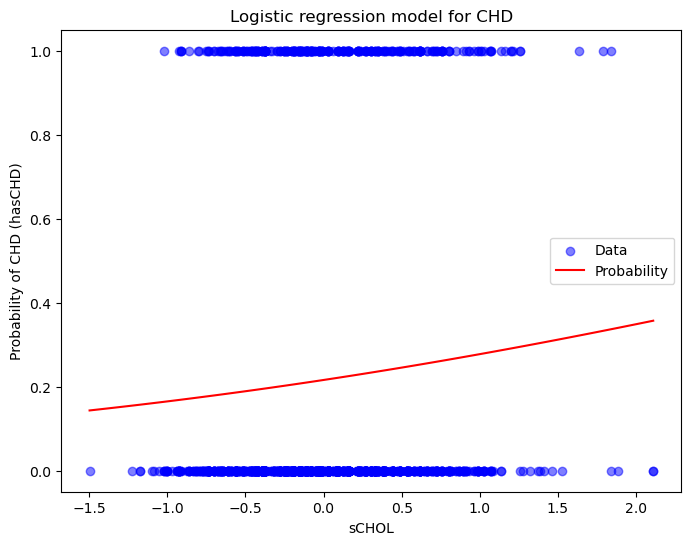

In [22]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
fram["hasCHD"] = (fram["CHD"] > 0).astype(int)
fit = smf.glm("hasCHD ~ sCHOL + sCIG + sFRW + sCIG:sCHOL + sFRW:sCHOL + sFRW:sCIG",
              data=fram, family=sm.families.Binomial()).fit()
coefficients = fit.params
var = 'sCHOL'

intercept = coefficients['Intercept']
sCHOL_coeff = coefficients[var]
sCHOL_range = np.linspace(fram[var].min(), fram[var].max(), 100)

probabilities = logistic(intercept + sCHOL_coeff * sCHOL_range)
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(fram[var], fram['hasCHD'], alpha=0.5, label='Data', color='blue')
plt.plot(sCHOL_range, probabilities, color='red', label='Probability')
plt.xlabel(var)
plt.ylabel('Probability of CHD (hasCHD)')
plt.title('Logistic regression model for CHD')
plt.legend()

Question: "Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?"
***
The error rate for the model is 0.220, which means the model predicts incorrectly about 22% of the time. The model is able to make reasonably accurate predictions, however it might be too high for practical use since it's a high-risk infrastructure.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [23]:
# exercise 17
# Put your solution here!
point = {
    "sCHOL": (200 - fram["CHOL"].mean()) / (2 * fram["CHOL"].std()),
    "sCIG": (17 - fram["CIG"].mean()) / (2 * fram["CIG"].std()),
    "sFRW": (100 - fram["FRW"].mean()) / (2 * fram["FRW"].std())
}
fit = smf.glm("hasCHD ~ sCHOL + sCIG + sFRW + sCIG:sCHOL + sFRW:sCHOL + sFRW:sCIG",
              data=fram, family=sm.families.Binomial()).fit()
point_df = pd.DataFrame([point])
predicted = fit.predict(point)[0]
print(predicted)


0.21616166025041
